<a href="https://colab.research.google.com/github/yusrilihza69/Kuis-1/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pip install pytesseract

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

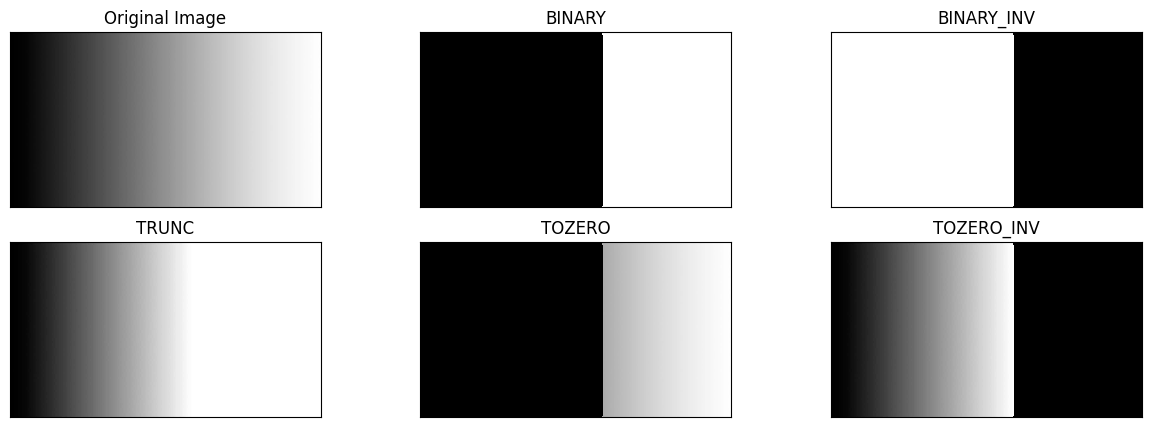

In [ ]:
img = Image.open('/content/drive/MyDrive/Images/gradient.jpg')
img = img.convert("L")

thresh = 170

loaded = img.load()

def thresholding(img, th):
  w, h = img.size
  pixels = img.load()

  th1 = Image.new("L", (w,h))
  th2 = Image.new("L", (w,h))
  th3 = Image.new("L", (w,h))
  th4 = Image.new("L", (w,h))
  th5 = Image.new("L", (w,h))

  pi1 = th1.load()
  pi2 = th2.load()
  pi3 = th3.load()
  pi4 = th4.load()
  pi5 = th5.load()

  for y in range(h):
    for x in range(w):
      if pixels[x,y] > th:
        pi1[x, y] = 255
        pi2[x, y] = 0
        pi3[x, y] = th
        pi4[x, y] = pixels[x,y]
        pi5[x, y] = 0
      else:
        pi1[x, y] = 0
        pi2[x, y] = 255
        pi3[x, y] = pixels[x,y]
        pi4[x, y] = 0
        pi5[x, y] = pixels[x,y]
  return th1, th2, th3, th4, th5

th1, th2, th3, th4, th5 = thresholding(img, thresh)

# Tampilkan gambar hasil thresholding
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

Nilai threshold dari Otsu's Thresholding: 171


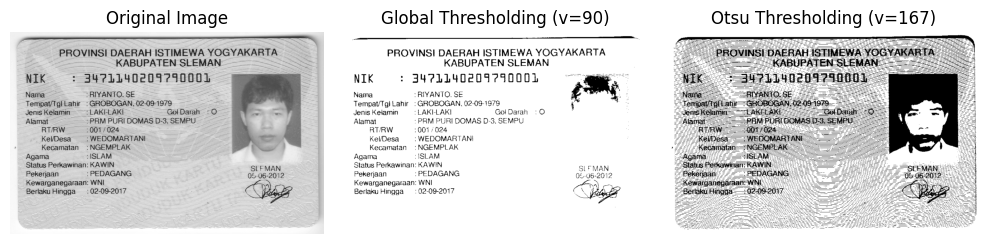

In [ ]:

# Fungsi Global Thresholding
def global_thresholding(image, threshold):
    binary = np.zeros_like(image)
    binary[image > threshold] = 255
    return binary

# Fungsi Otsu's Thresholding
def otsu_thresholding(image):
    # Normalisasi histogram
    hist = np.histogram(image, bins=256, range=(0, 256))[0].astype(float)
    hist /= hist.sum()

    maximum = 0
    threshold = 0
    sum_b = 0
    sum_f = np.dot(np.arange(256), hist)
    for t in range(256):
        w_b = np.sum(hist[:t])
        w_f = 1 - w_b
        if w_b == 0 or w_f == 0:
            continue
        sum_b += t * hist[t]
        m_b = sum_b / w_b
        m_f = (sum_f - sum_b) / w_f
        between_class_variance = w_b * w_f * (m_b - m_f) ** 2
        if between_class_variance > maximum:
            maximum = between_class_variance
            threshold = t

    return threshold

# Path file gambar
image_path = '/content/drive/MyDrive/Images/ktp_more/ktp.png'

# Baca gambar dari path
image = np.array(Image.open(image_path).convert("L"))

# Global Thresholding dengan v=90
global_threshold = global_thresholding(image, 90)

# Otsu's Thresholding
otsu_threshold = otsu_thresholding(image)

# Tampilkan gambar dan hasil thresholding
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_threshold, cmap='gray')
plt.title('Global Thresholding (v=90)')
plt.axis('off')

plt.subplot(1, 3, 3)
otsu_binary = np.zeros_like(image)
otsu_binary[image > otsu_threshold] = 255
plt.imshow(otsu_binary, cmap='gray')
plt.title('Otsu Thresholding (v=167)')
plt.axis('off')

# Otsu's Thresholding
otsu_threshold = otsu_thresholding(image)
print("Nilai threshold dari Otsu's Thresholding:", otsu_threshold)


plt.tight_layout()
plt.show()

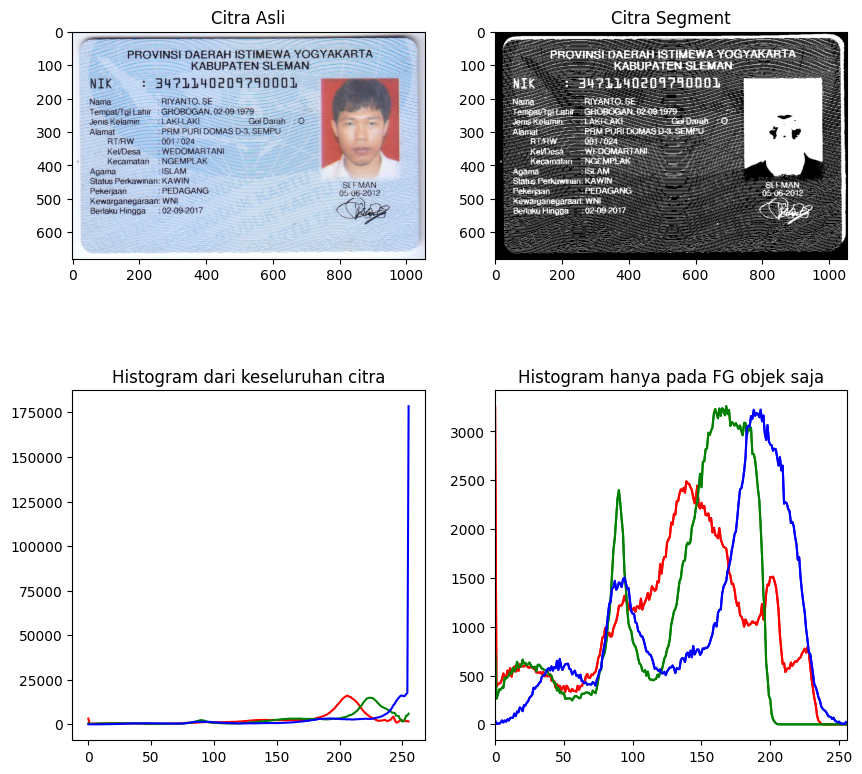

In [ ]:
#a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

pict_3 = ('/content/drive/MyDrive/Images/ktp_more/ktp.png')
img_l = cv2.imread(pict_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

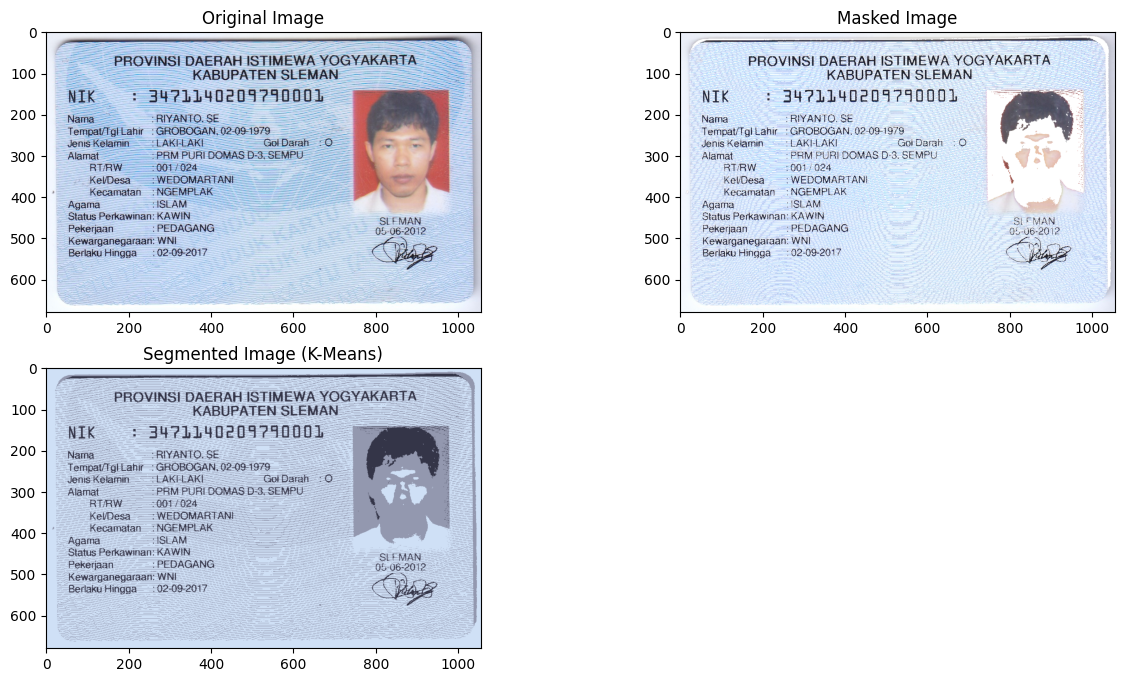

In [ ]:
# Load the image
fotoo = cv2.imread('/content/drive/MyDrive/Images/ktp_more/ktp.png')
fotoo = cv2.cvtColor(fotoo, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = fotoo.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(fotoo)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(fotoo.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(fotoo.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(fotoo)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (3,613 kB/s)
debconf: unable to ini

Teks Hasil Pembacaan:
——————————
PROVINS! DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN 7
NIK  : 3471240209790001
Nama /RIYANTO. SE
Tempat/TgtLahir : GROBOGAN, 02-09-1979
Jens Kelamin :LAKILLAKI GolDarah :O ~~ oo.
Alamat : PRM PURI DOMAS D-3, SEMPU.
RTRW 2001 /024
KevDesa  : WEDOMARTANI oC
Kecamatan :NGEMPLAK '
Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG oon ye
Kewarganegaraan: WNI >
Berlaku Hingga 02-09-2017 Ree



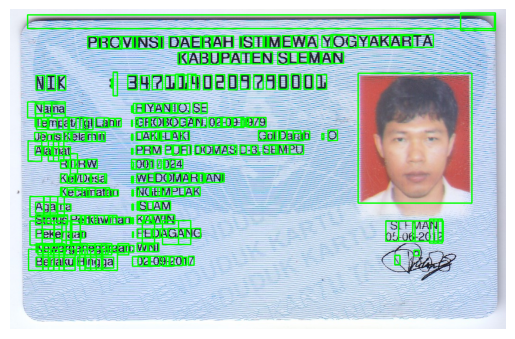

In [ ]:
# Baca gambar dari file
image = cv2.imread('/content/drive/MyDrive/Images/ktp_more/ktp.png')


# Langkah 1: Prapemrosesan gambar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Peningkatan kontras
alpha = 1.5  # Sesuaikan nilai alpha sesuai kebutuhan
beta = 0     # Sesuaikan nilai beta sesuai kebutuhan
enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

# Langkah 2: Deteksi teks pada gambar
custom_config = r'--oem 3 --psm 6'  # Sesuaikan konfigurasi OCR sesuai kebutuhan
detected_text = pytesseract.image_to_string(enhanced_image, config=custom_config)

# Langkah 3: Menampilkan teks hasil pembacaan
print("Teks Hasil Pembacaan:")
print(detected_text)

# Tampilkan gambar dengan kotak deteksi teks (opsional)
h, w = enhanced_image.shape
boxes = pytesseract.image_to_boxes(enhanced_image)
for b in boxes.splitlines():
    b = b.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 255, 0), 2)

# Tampilkan gambar dengan kotak deteksi teks (opsional)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
